polyfit:
	y = 0.9849658777124273f * x + 0.7597567328389282f 
avg:
	y = 0.9928951508220701f * x


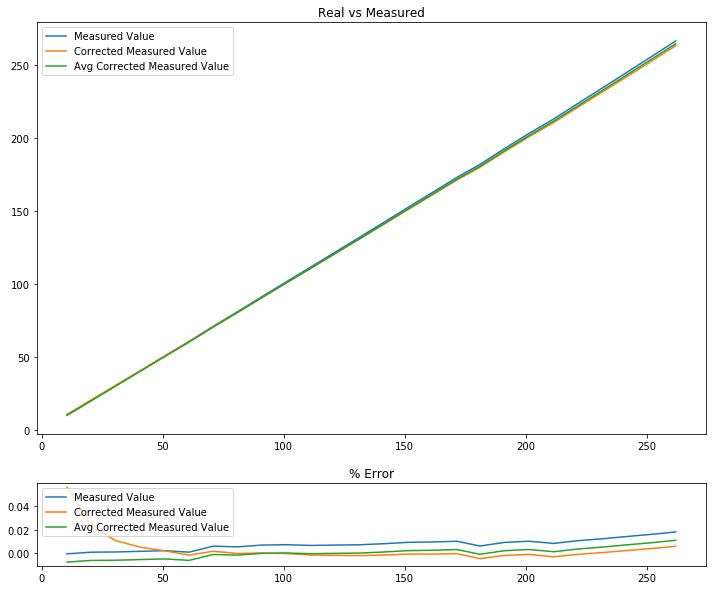

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

## Get dataset
data = pd.read_csv('erro_rms.csv')
real_rms_value = data[data.columns[0]]
measured_rms_value = data[data.columns[1]]


## Polyfit
z = np.polyfit(measured_rms_value, real_rms_value, 1)
p = np.poly1d(z)
corrected_measured_rms_value = p(measured_rms_value)
print(f"polyfit:\n\ty = {p[1]}f * x + {p[0]}f ")


## Linear Average Correction
avg = np.average(real_rms_value/measured_rms_value)
avg_corrected_measured_rms_value = avg * measured_rms_value
print(f"avg:\n\ty = {avg}f * x")


## Compute errors
measured_rms_value_error = (measured_rms_value -real_rms_value)/real_rms_value
corrected_measured_rms_value_error = (corrected_measured_rms_value -real_rms_value)/real_rms_value
avg_corrected_measured_rms_value_error = (avg_corrected_measured_rms_value -real_rms_value)/real_rms_value


## Plot Results
f, (a0, a1) = plt.subplots(2, 1, figsize=(12,10), gridspec_kw={'height_ratios': [5, 1]})

a0.set_title('Real vs Measured')
a0.plot(real_rms_value, measured_rms_value, label='Measured Value')
a0.plot(real_rms_value, corrected_measured_rms_value, label='Corrected Measured Value')
a0.plot(real_rms_value, avg_corrected_measured_rms_value, label='Avg Corrected Measured Value')
a0.legend()

a1.set_title('% Error');
a1.plot(real_rms_value, measured_rms_value_error, label='Measured Value')
a1.plot(real_rms_value, corrected_measured_rms_value_error, label='Corrected Measured Value')
a1.plot(real_rms_value, avg_corrected_measured_rms_value_error, label='Avg Corrected Measured Value')
a1.legend(loc='upper left')

plt.show()